# Problem Statement:
- We are given a dataset containing details of a news popularity on different social media platforms. The popularity of a particular news article depends on the total number of times the article has been shared across the platforms. The higher the shares count higher is the popularity, lower the shares count lower the popularity.
- Predict the total number of times a article can be shared for it to become popular based on the input columns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("OnlineNewsPopularity.csv")
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [3]:
df.shape

(39644, 61)

# Observations:
- The data contains 39644 rows and 61 colums
- Each rows represent one article popularity

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1   timedelta                       39644 non-null  float64
 2   n_tokens_title                  39644 non-null  float64
 3   n_tokens_content                39644 non-null  float64
 4   n_unique_tokens                 39644 non-null  float64
 5   n_non_stop_words                39644 non-null  float64
 6   n_non_stop_unique_tokens        39644 non-null  float64
 7   num_hrefs                       39644 non-null  float64
 8   num_self_hrefs                  39644 non-null  float64
 9   num_imgs                        39644 non-null  float64
 10  num_videos                      39644 non-null  float64
 11  average_token_length            39644 non-null  float64
 12  num_keywords                    

# Observations:
- There are 59 float, 1 int & 1 object column present in our data


In [5]:
# Dropping duplicate rows
df = df.drop_duplicates()

In [6]:
df.shape

(39644, 61)

# Observations:
- We observe that data does not contain any duplicate rows.

In [7]:
## Missing Values

df.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [8]:
# Checking for all variables which contain missing values

n = df.isnull().sum()
n[n>0]

Series([], dtype: int64)

# Observations:
- When checked for missing values for all the variables we see that no column contain missing values

# Exploratory Data Analysis

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
n_unique_tokens,39644.0,0.548216,3.520708,0.00000,0.470870,0.539226,0.608696,701.000000
n_non_stop_words,39644.0,0.996469,5.231231,0.00000,1.000000,1.000000,1.000000,1042.000000
n_non_stop_unique_tokens,39644.0,0.689175,3.264816,0.00000,0.625739,0.690476,0.754630,650.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000


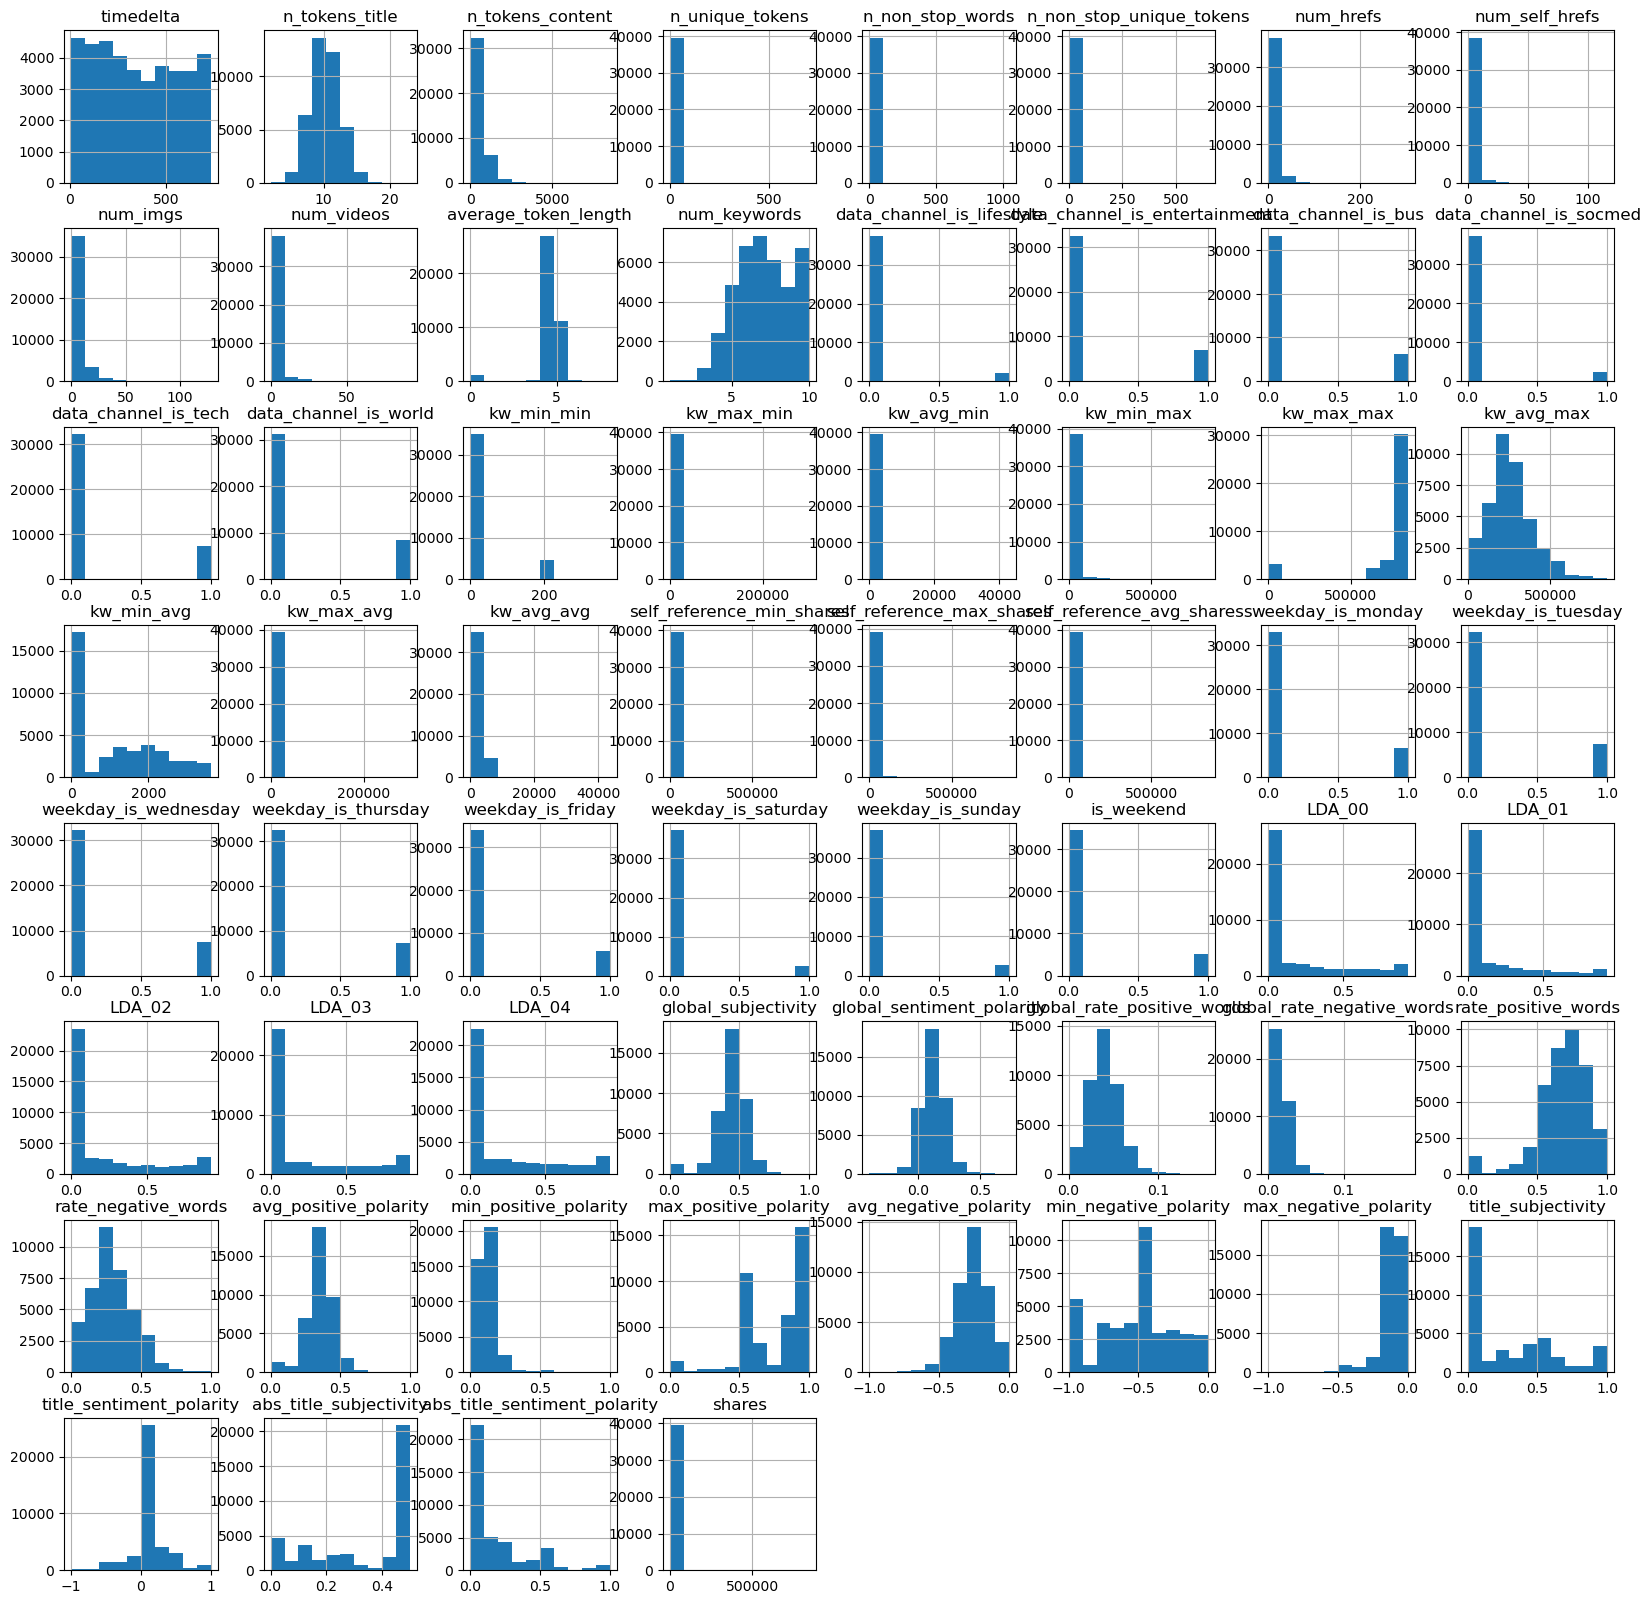

In [10]:
df.hist(figsize = (20, 20))
plt.show()

####  Checking the impact of num_images and num_videos with the share count of an article

<Axes: xlabel='num_imgs', ylabel='shares'>

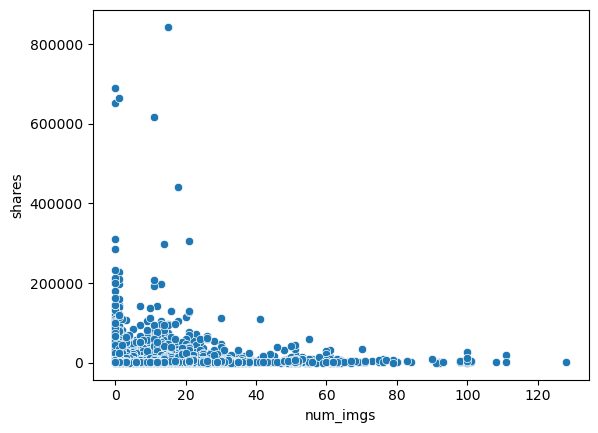

In [11]:
sns.scatterplot(x = df["num_imgs"], y = df["shares"])

# Observations:
- When the num_images in a news crosses 20 images we clearly see that people loose interest to share that article or even read that article with so many images.
- When the article contains 0 to 20 images, we can call it as a sweet spot, since whenever an article is having number of images in this range it has got higher share implying higher popularity.
- The article gets highest popularity when there are upto 5 images included in that article.

<Axes: xlabel='num_videos', ylabel='shares'>

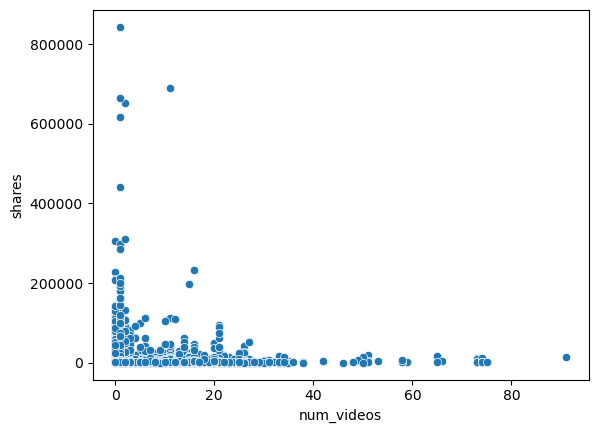

In [12]:
sns.scatterplot(x = df["num_videos"], y = df["shares"])

# Observations:
- It can be observed that the num of videos also convey the same story as num of images.
- We conclude that for an article to become we must include images and videos to keep people engaged throughout the article.

<Axes: xlabel='n_tokens_content', ylabel='shares'>

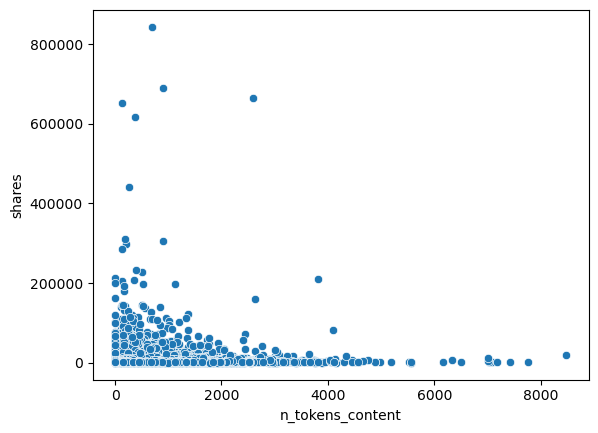

In [13]:
sns.scatterplot(x = df["n_tokens_content"], y = df["shares"])

# Conclusion:
- Shorter the article higher the popularity

<Axes: xlabel='is_weekend', ylabel='shares'>

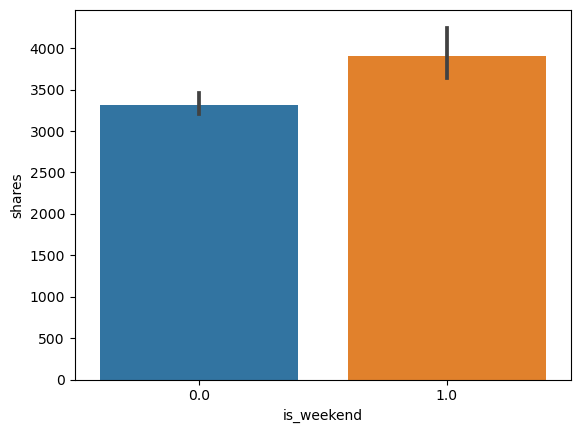

In [14]:
sns.barplot(x = df["is_weekend"], y = df["shares"])

# Conclusion:
- Definitely publishing an article on weekend has slight edge compared to weekday.
- But, be it weekday or a weekend, all that matter for popularity is the content of the news article

<Axes: xlabel='num_hrefs', ylabel='shares'>

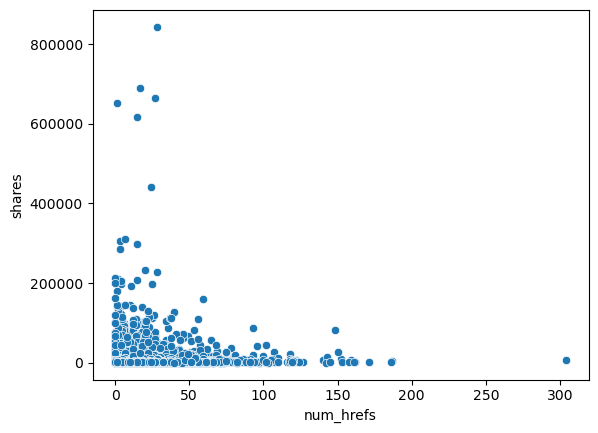

In [15]:
sns.scatterplot(x = df["num_hrefs"], y = df["shares"])

In [16]:
# Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset

df = df.drop('url',axis=1)
df = df.drop('timedelta',axis=1)


<Axes: >

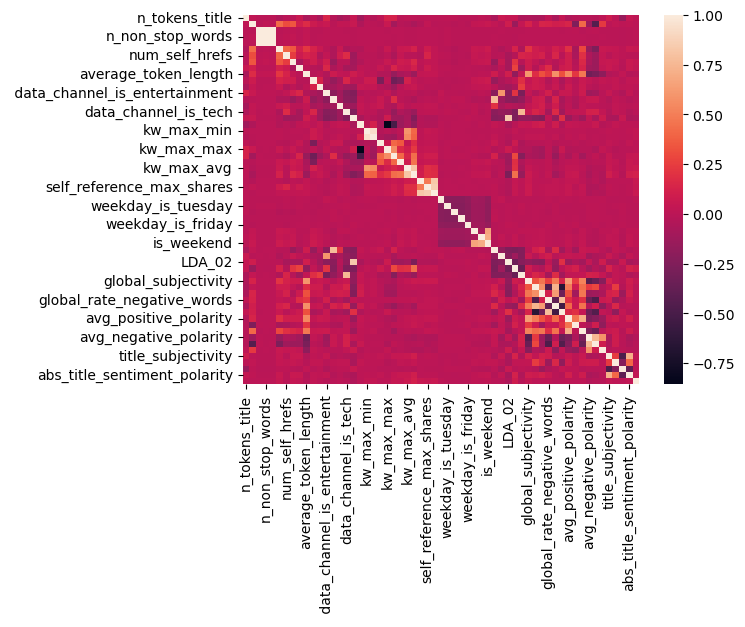

In [17]:
sns.heatmap(df.corr())

In [18]:
# Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min" can be checking using data.corr()

df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

#### Based out of shares create a new column called popularity

In [19]:
df["shares"].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [20]:
df["shares"].median()

1400.0

In [21]:
# Create a new target variable
df["popularity"] = df["shares"].apply(lambda x : 0 if x < 1400 else 1)

In [22]:
df[["popularity", "shares"]]

,popularity,shares
0,0,593
1,0,711
2,1,1500
3,0,1200
4,0,505
...,...,...
39639,1,1800
39640,1,1900
39641,1,1900
39642,0,1100


<Axes: xlabel='popularity', ylabel='count'>

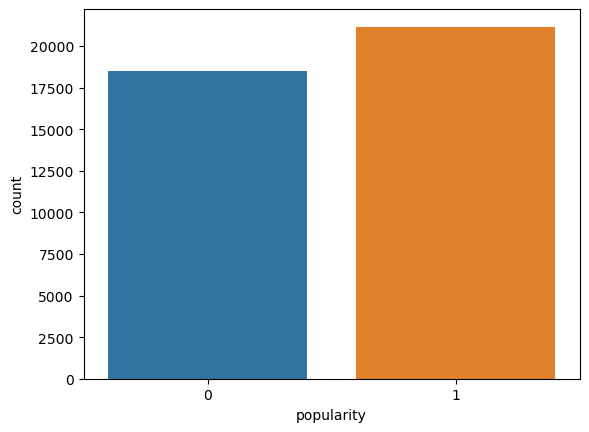

In [23]:
sns.countplot(x = df["popularity"])

## Checking the popularity of an aricle on each day of the week

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 57 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   n_tokens_title                  39644 non-null  float64
 1   n_tokens_content                39644 non-null  float64
 2   n_unique_tokens                 39644 non-null  float64
 3   num_hrefs                       39644 non-null  float64
 4   num_self_hrefs                  39644 non-null  float64
 5   num_imgs                        39644 non-null  float64
 6   num_videos                      39644 non-null  float64
 7   average_token_length            39644 non-null  float64
 8   num_keywords                    39644 non-null  float64
 9   data_channel_is_lifestyle       39644 non-null  float64
 10   data_channel_is_entertainment  39644 non-null  float64
 11  data_channel_is_bus             39644 non-null  float64
 12  data_channel_is_socmed          

In [25]:
a, b = df["shares"].mean(), df["shares"].median()

In [26]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 3395.3801836343455
Median article share = 1400.0


In [27]:
Wday = df.columns.values[26:33]
Wday

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

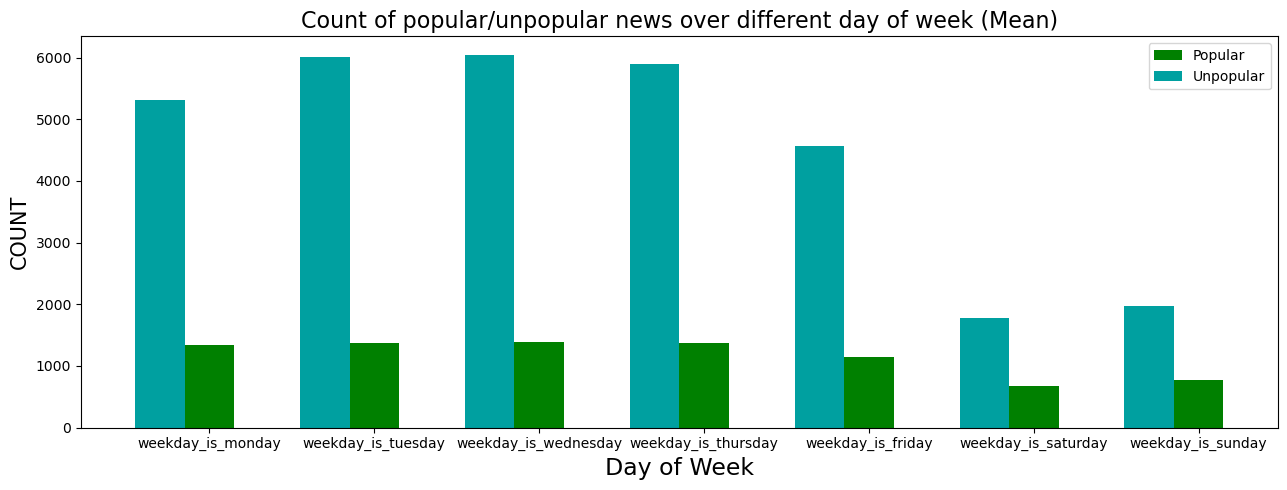

In [28]:
Unpop=df[df['shares']<a]
Pop=df[df['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

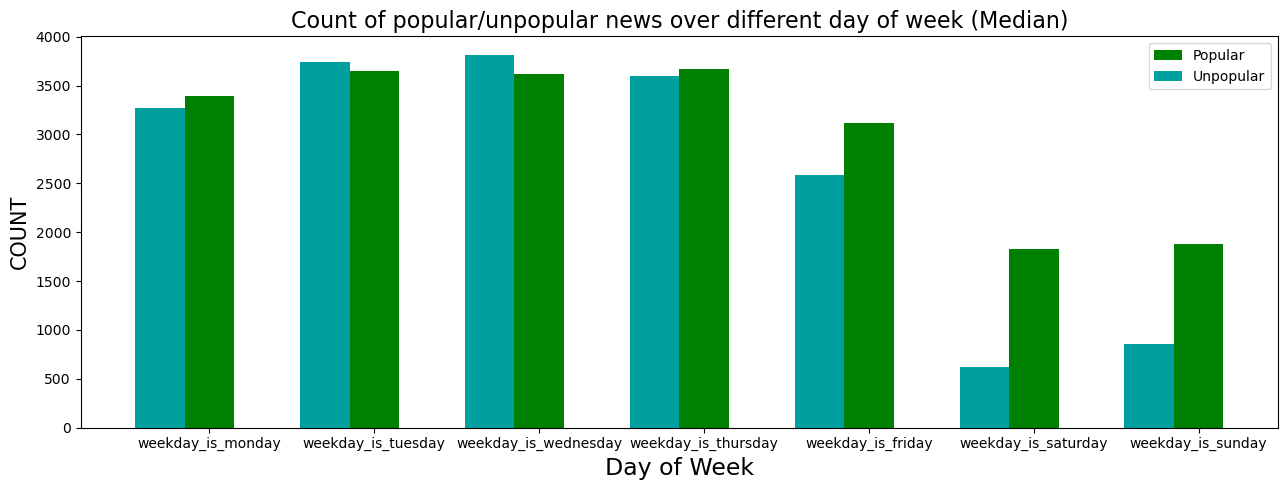

In [29]:
Unpop=df[df['shares']<b]
Pop=df[df['shares']>=b]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

### Using the above code, check for which data channel the popularity will be the highest?

# Outlier Analysis

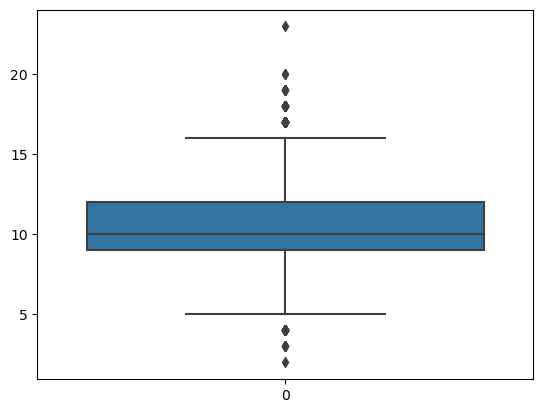

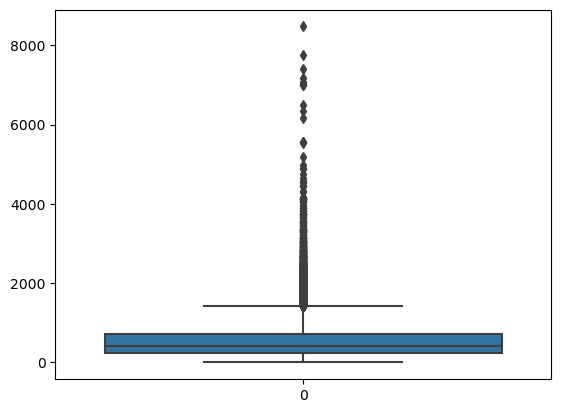

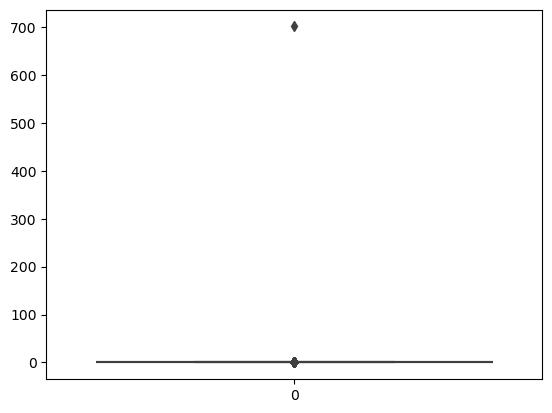

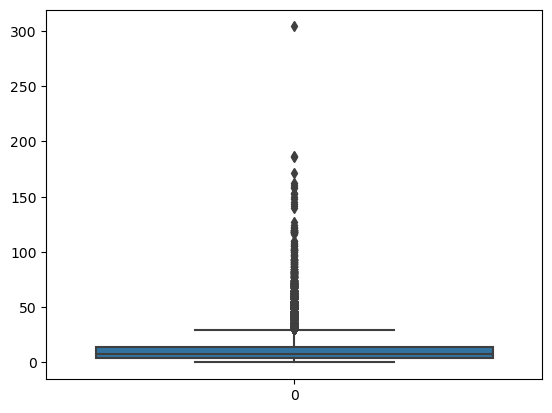

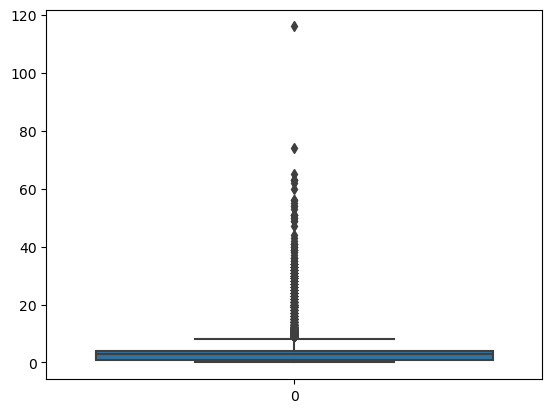

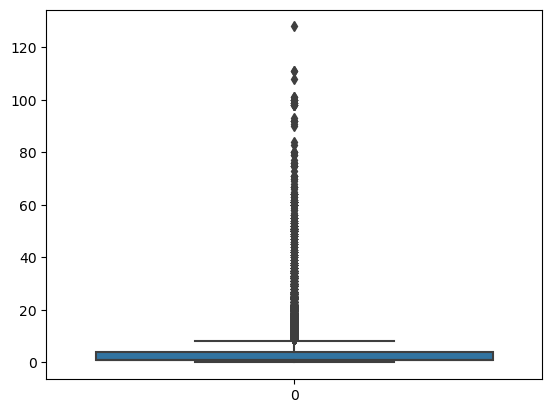

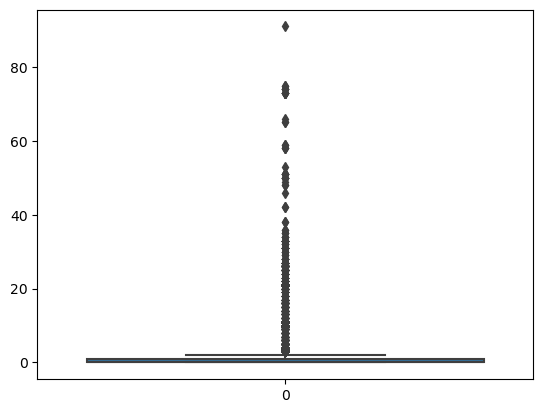

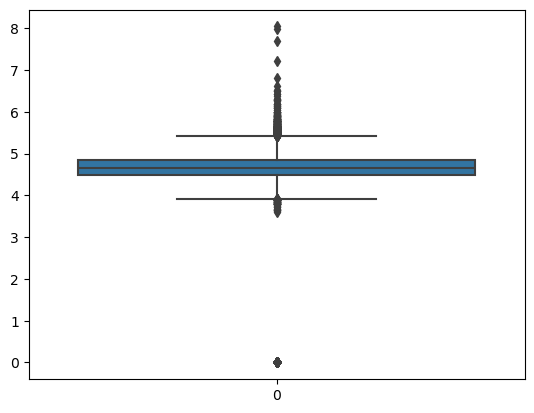

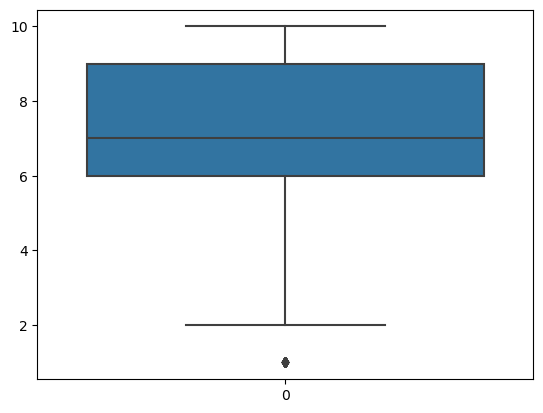

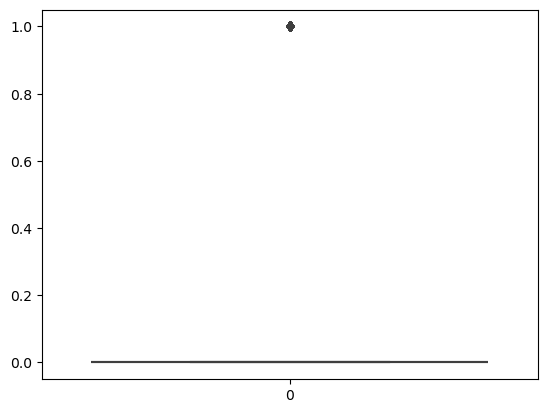

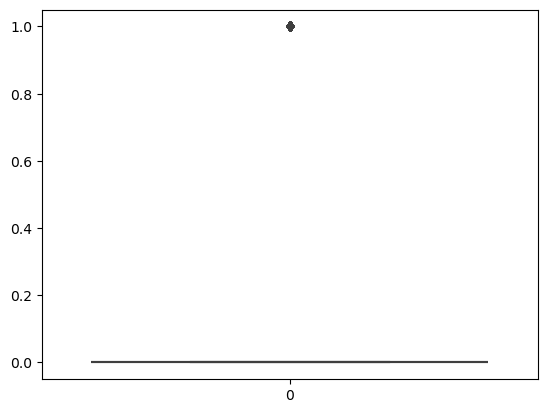

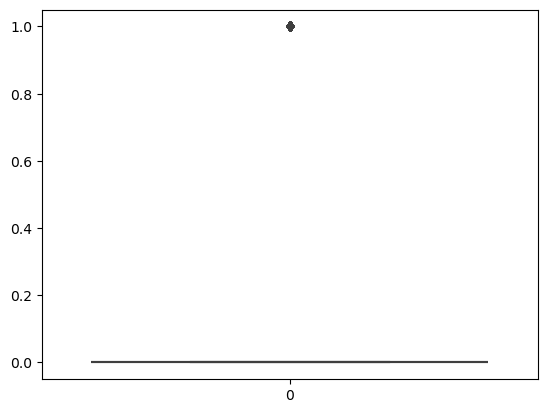

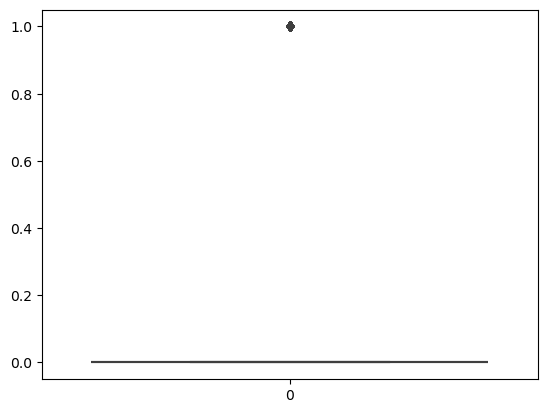

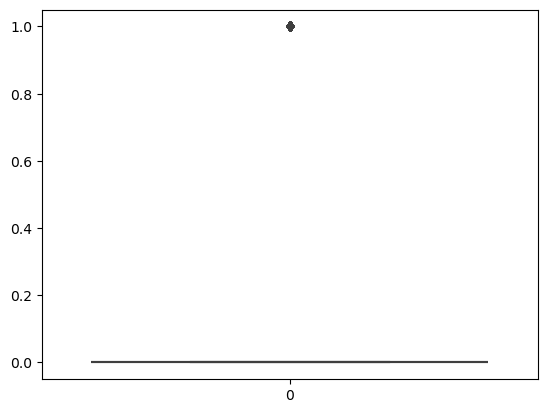

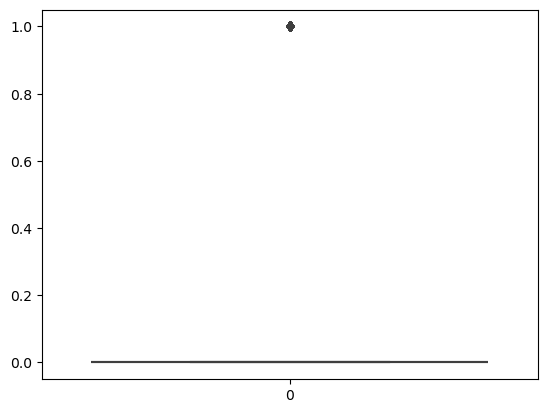

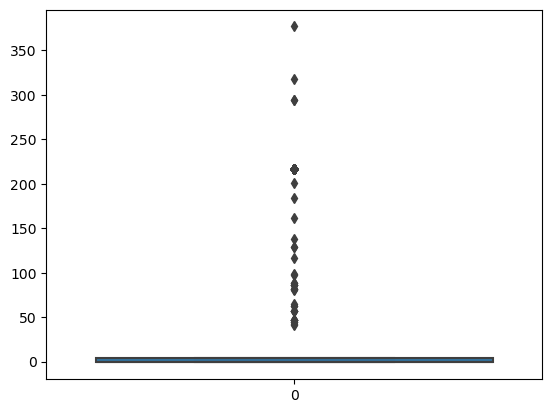

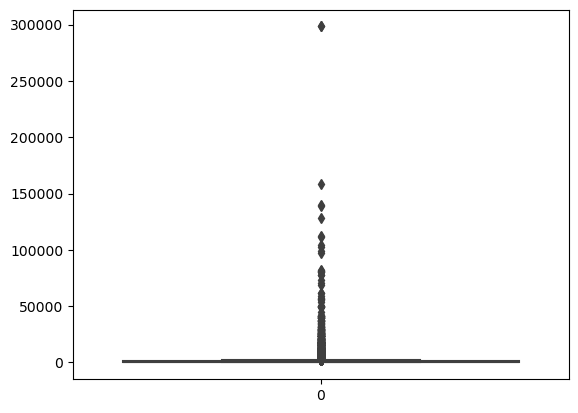

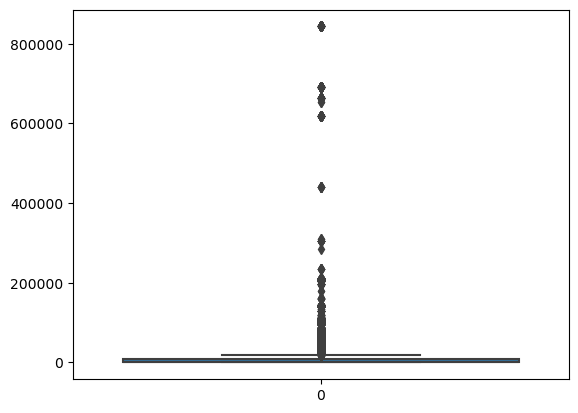

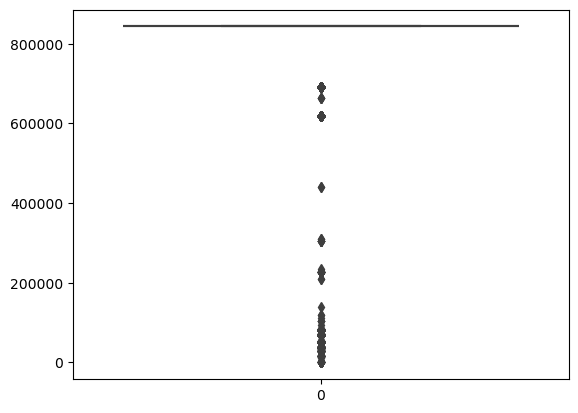

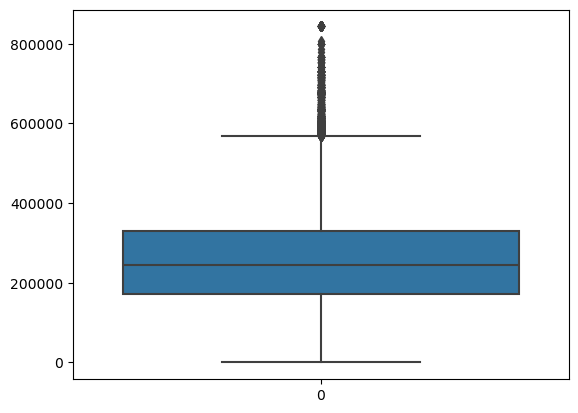

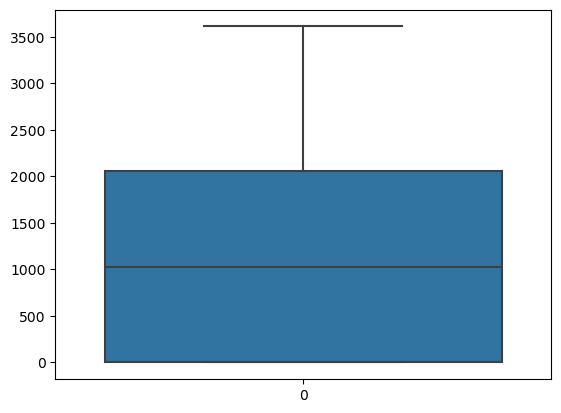

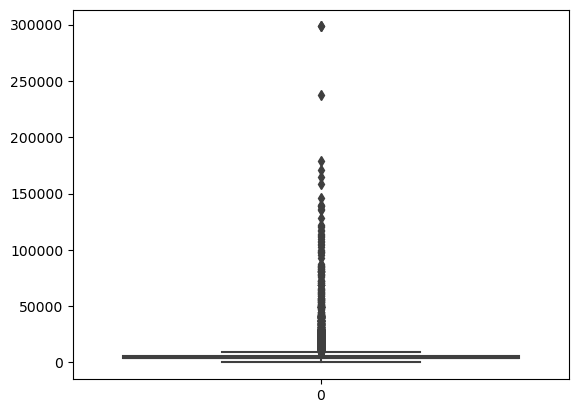

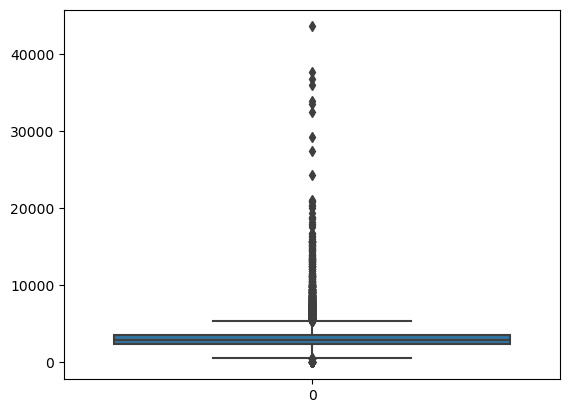

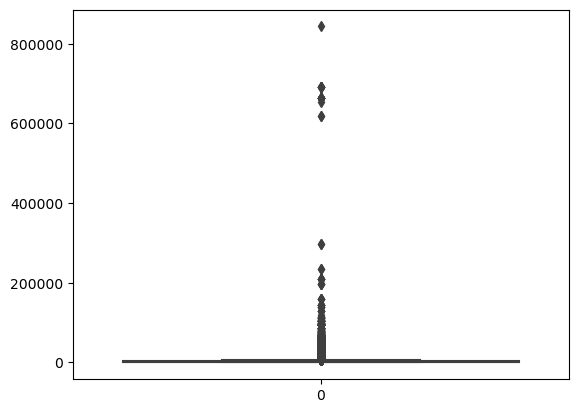

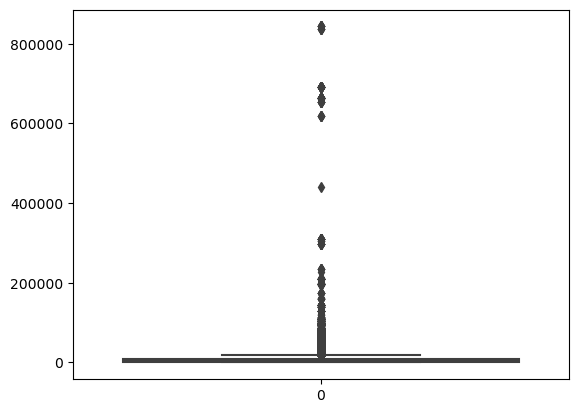

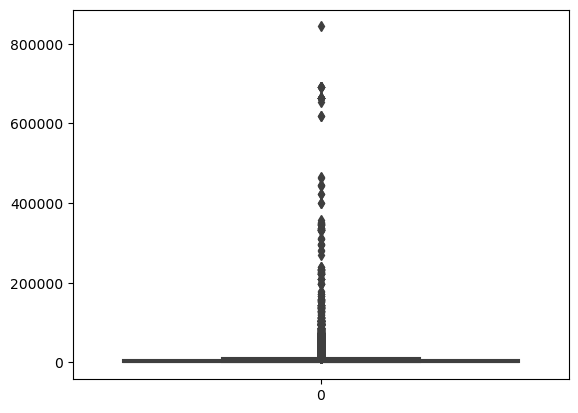

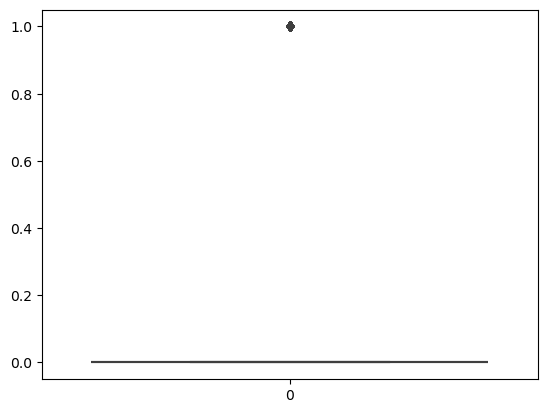

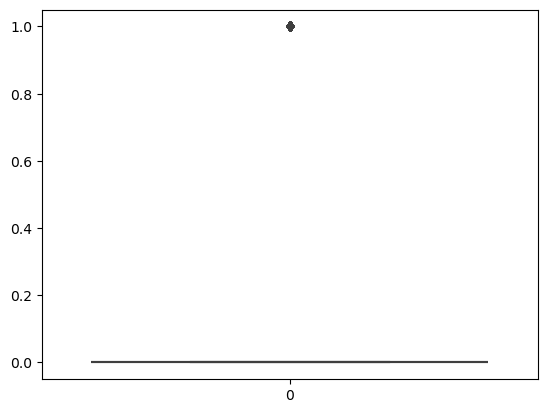

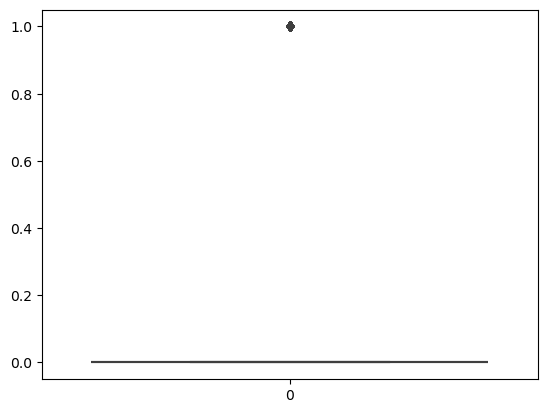

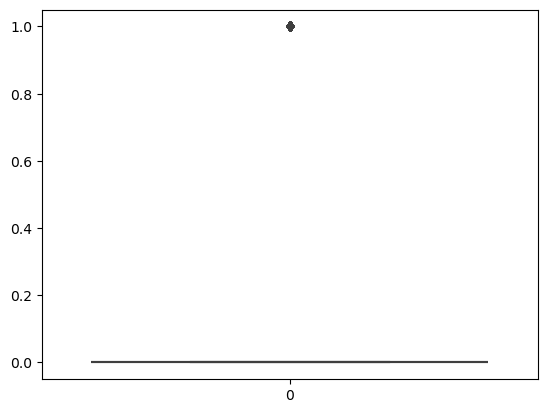

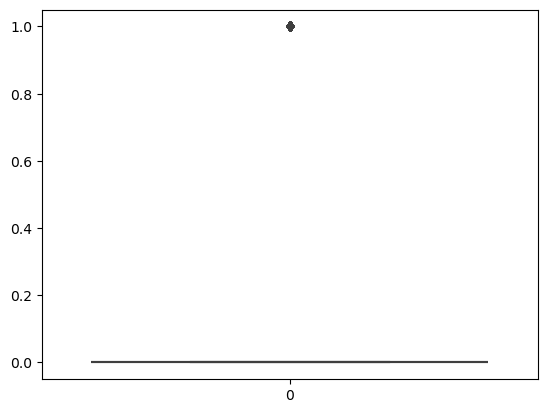

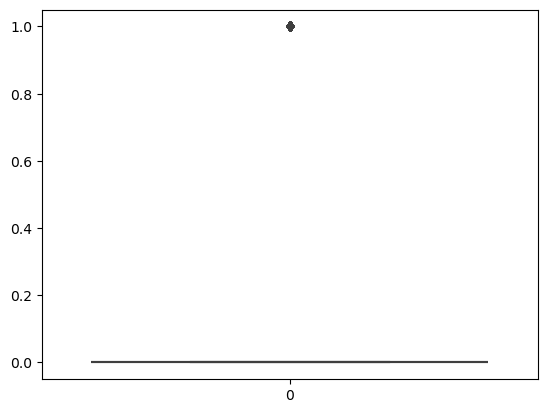

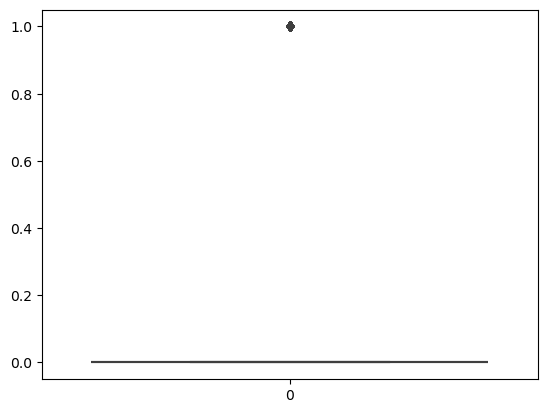

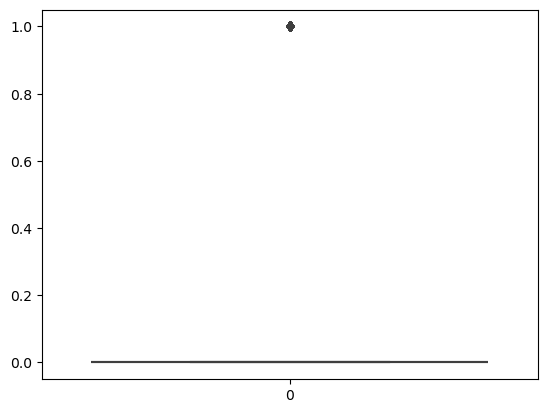

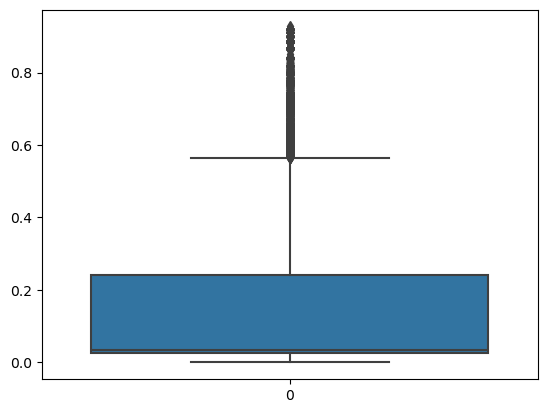

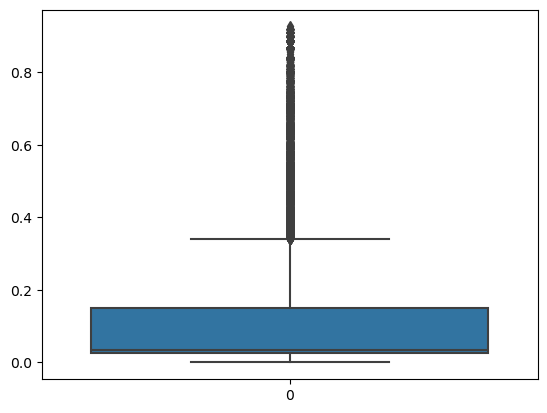

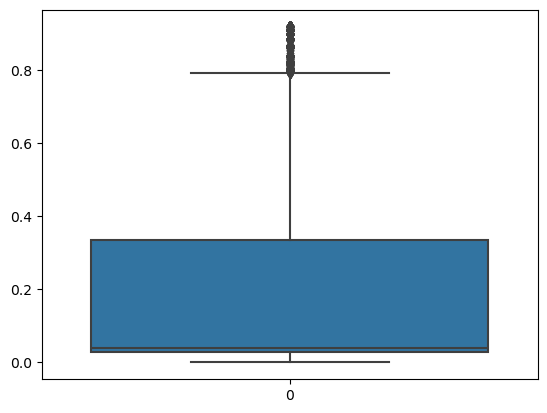

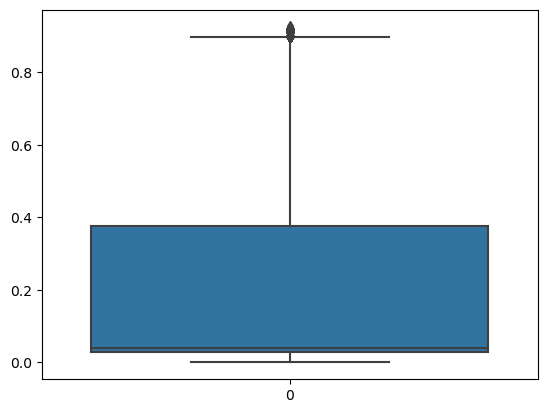

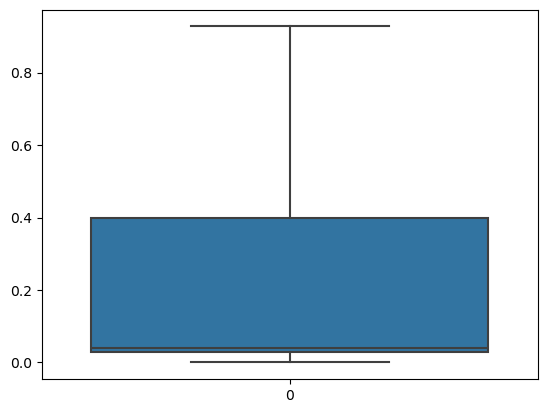

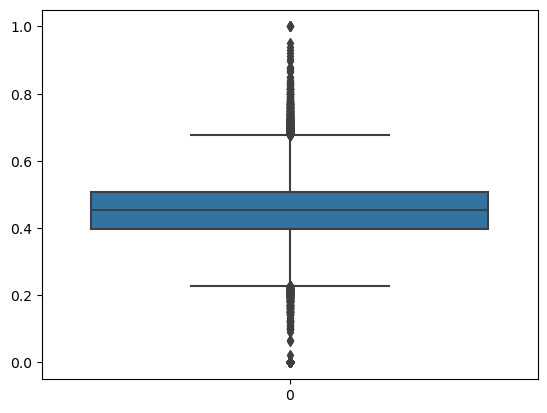

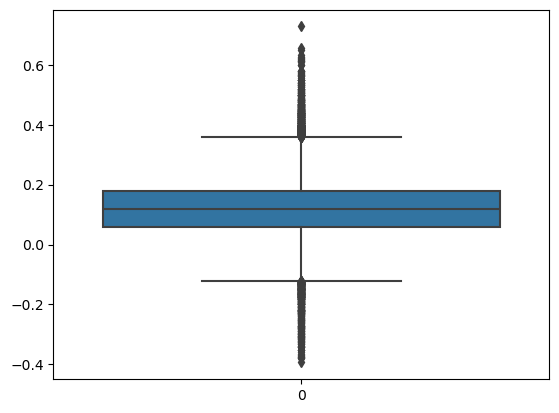

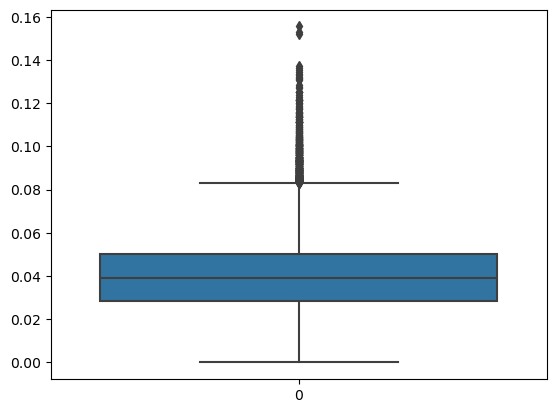

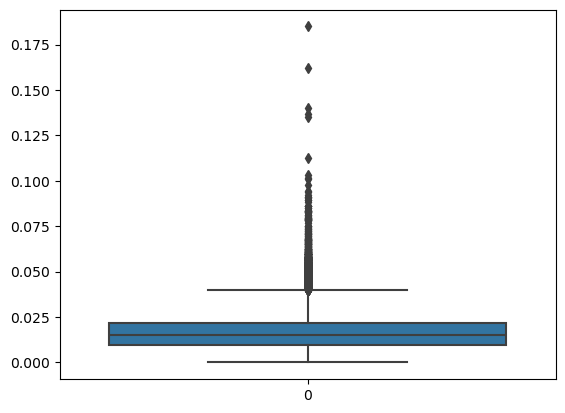

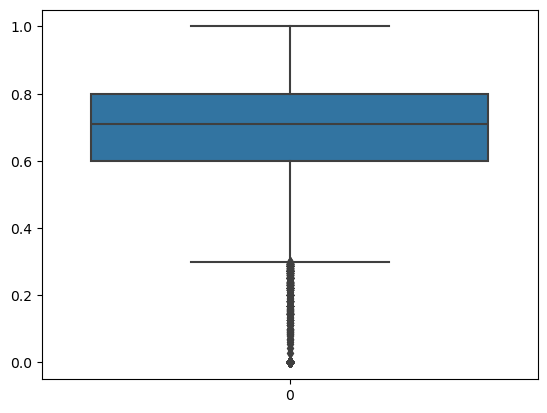

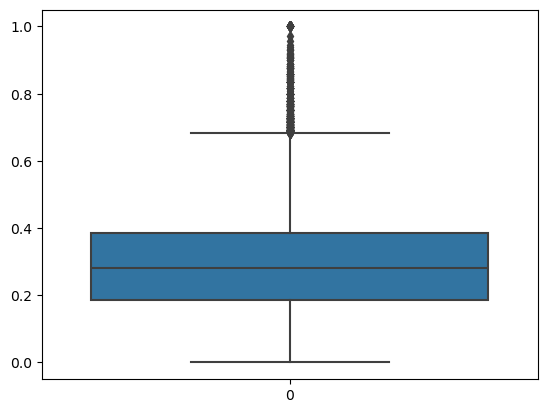

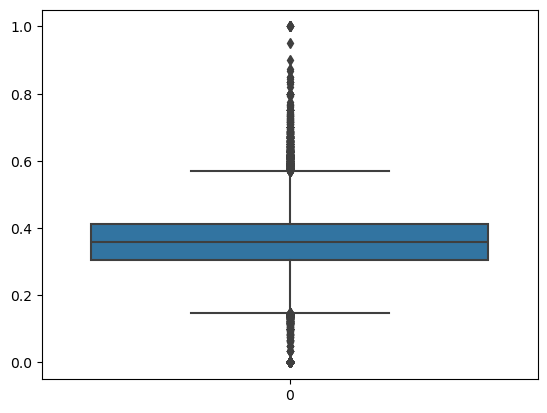

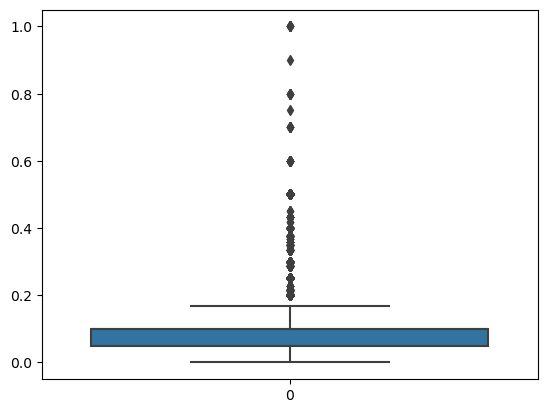

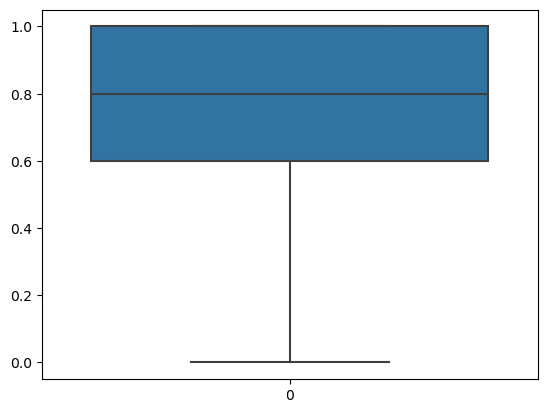

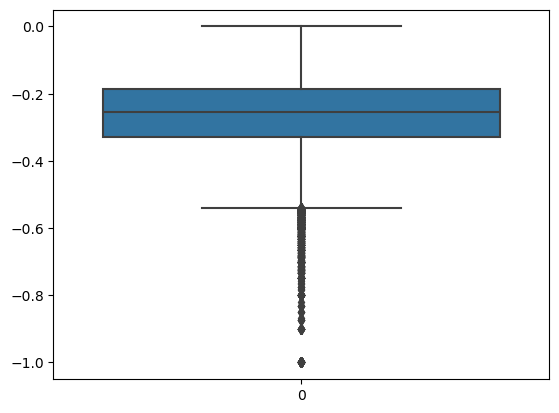

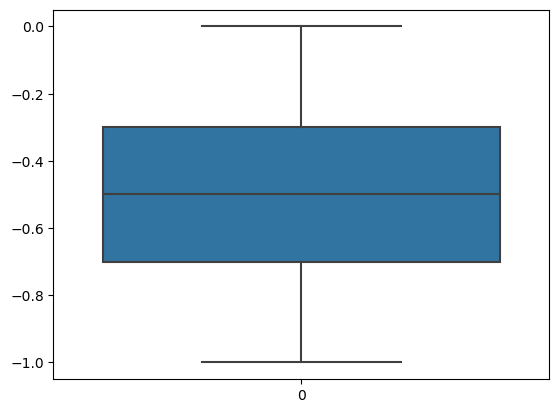

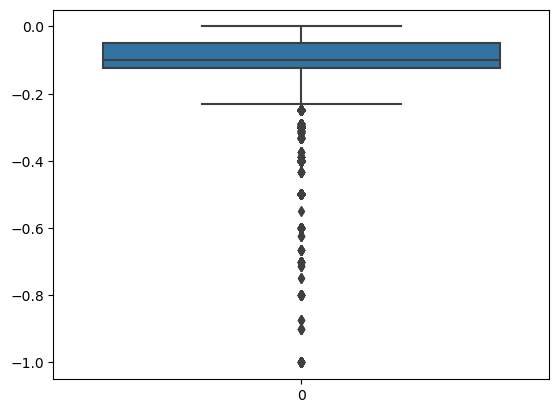

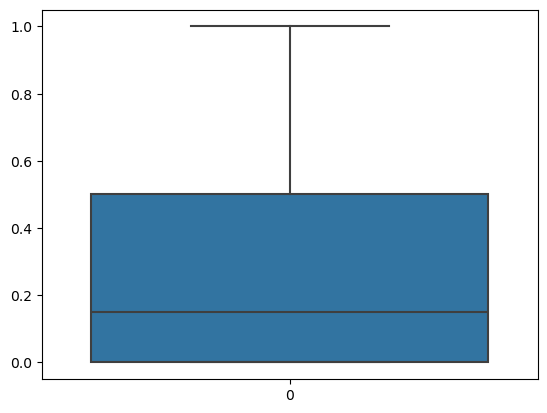

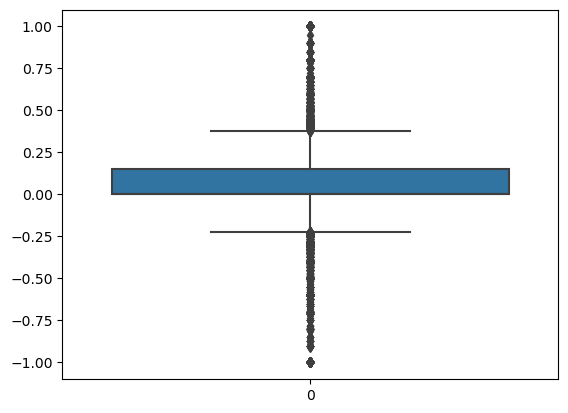

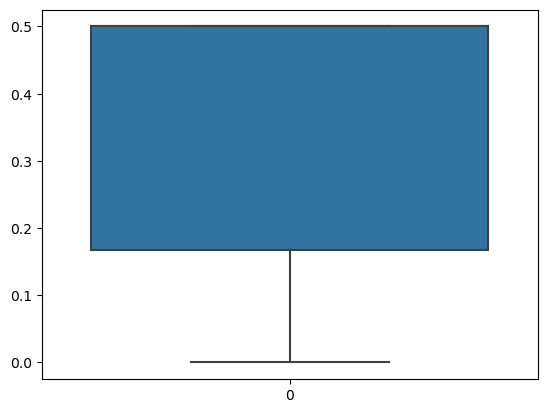

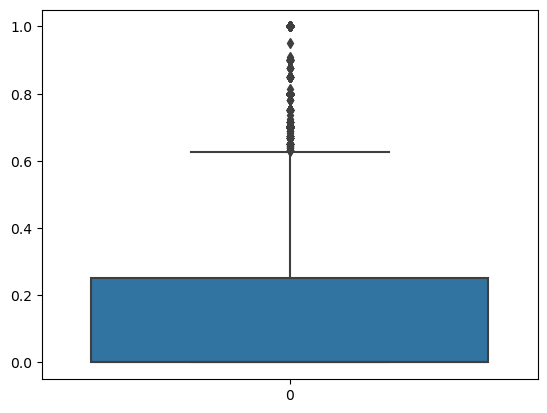

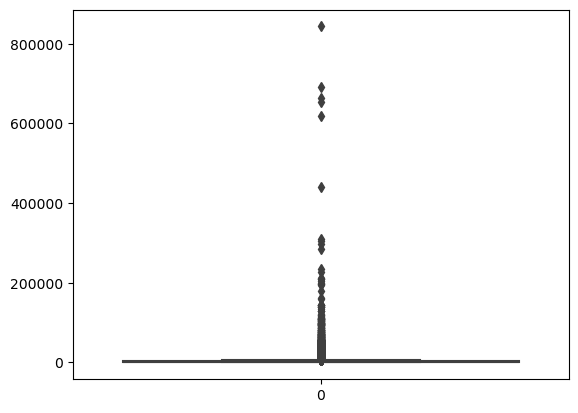

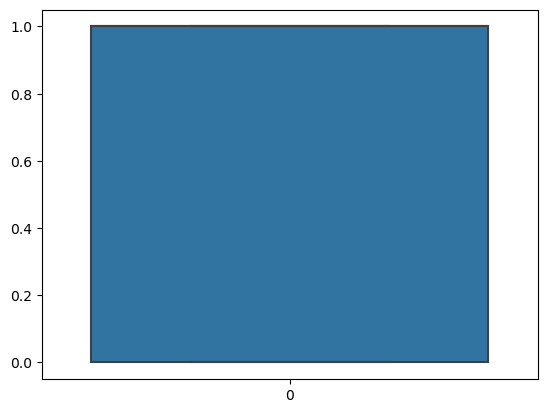

In [30]:
num_cols = df.select_dtypes(['int64','float64']).columns     ## Selecting only int and float columns from the dataset
for i in range(len(num_cols)):
    sns.boxplot(df[num_cols[i]])
    plt.show()

In [31]:
for column in num_cols:    
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 156
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1933
-459.0
1421.0
470.0
Number of outliers in "n_unique_tokens" : 1604
0.26413257237362486
0.8154334940046252
0.13782523040775008
Number of outliers in "num_hrefs" : 2169
-11.0
29.0
10.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7703
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2946
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 1681
3.9137519022487495
5.419490794138751
0.37643472297250025
Number of outliers in "num_keywords" : 51
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2099
0.0
0.0
0.0
Number of outliers in " data_channel_is_entertainment" : 7057
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6258
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2323
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7346
0.0
0.0
0.0
Number of outliers in "data_channel_is_world

# Scaling the dataset

In [34]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       ' data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'av

In [36]:
# df2_num  dataframe contains numerical feaures.

df2_num=df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagoricl features.

df2_cat=df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [37]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from df2_num

df2_num = df2_num.drop('shares',axis=1)

In [38]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', ' data_channel_is_entertainment', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [39]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['n_tokens_content', 'n_unique_tokens', 'num_hrefs', 'num_self_hrefs',
       'num_imgs', 'num_videos', 'average_token_length',
       ' data_channel_is_entertainment', 'kw_min_min', 'kw_max_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [40]:
#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [41]:
# Droping old negative column

for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [42]:
# Checking negative columns

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [43]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [44]:
# Checking outliers again

num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = df2_num_add[column].quantile(0.25)    # First Quartile
    q3 = df2_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 156
3.0487171563914064
9.37268037031084
1.5809908034798585
Number of outliers in "num_keywords" : 51
0.05886634074089958
15.09438135329987
3.7588787531397427
Number of outliers in "n_tokens_content_new" : 1751
2.717570488835534
45.47485864950194
10.689322040166601
Number of outliers in "n_unique_tokens_new" : 1530
0.24911306563898541
0.5863425038147677
0.08430735954394558
Number of outliers in "num_hrefs_new" : 240
-0.21387749284402635
4.899759371676185
1.2784092161300529
Number of outliers in "num_self_hrefs_new" : 441
-0.6414586662243275
2.8982241361172645
0.884920700585398
Number of outliers in "num_imgs_new" : 0
-0.16502780366473635
1.8150129859305655
0.49501019739882546
Number of outliers in "num_videos_new" : 0
-0.6274038673954141
1.0456731123256902
0.41826924493027606
Number of outliers in "average_token_length_new" : 2003
177.7072716374472
647.4432357354366
117.43399102449735
Number of outliers in " data_channel_is_entertainment_new" : 7

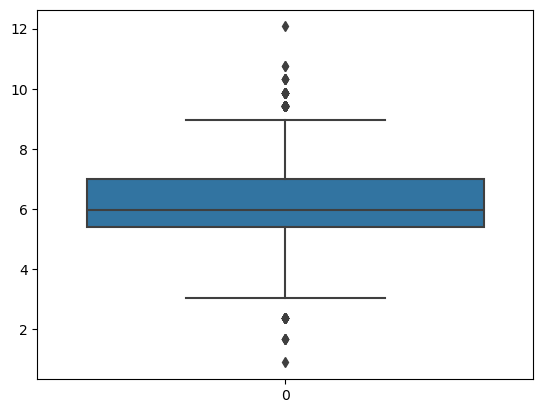

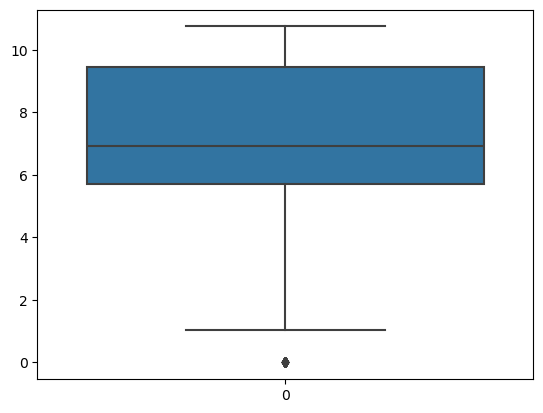

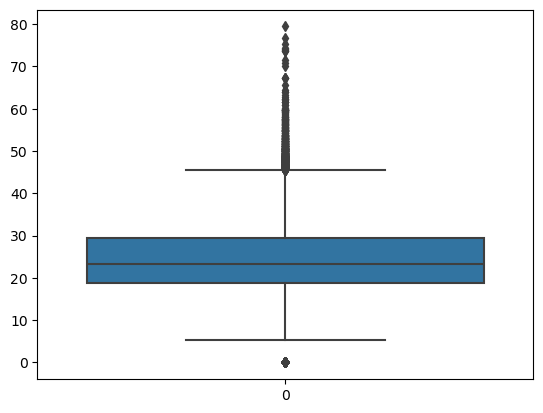

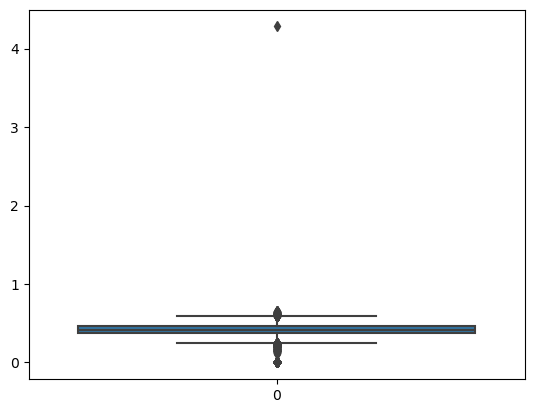

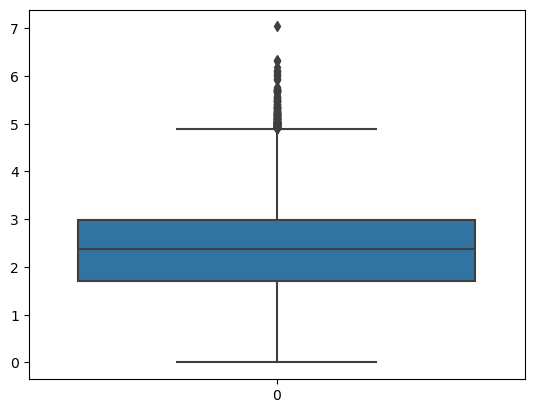

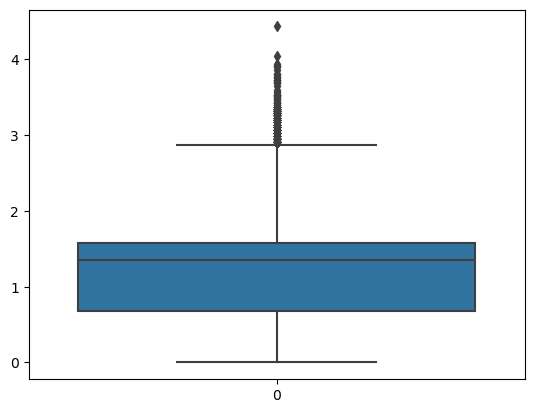

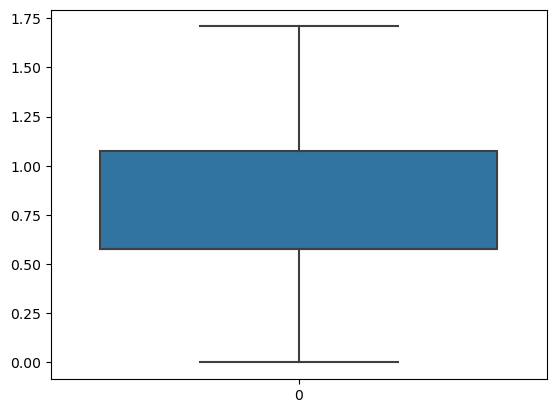

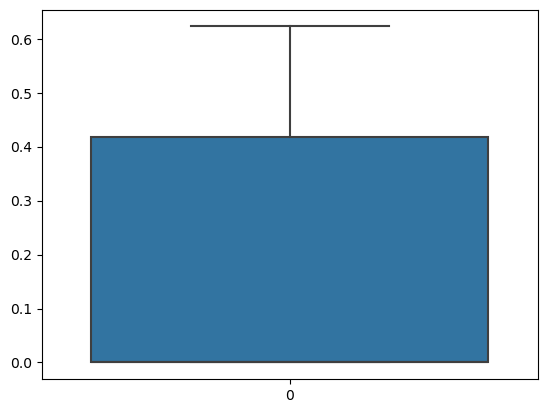

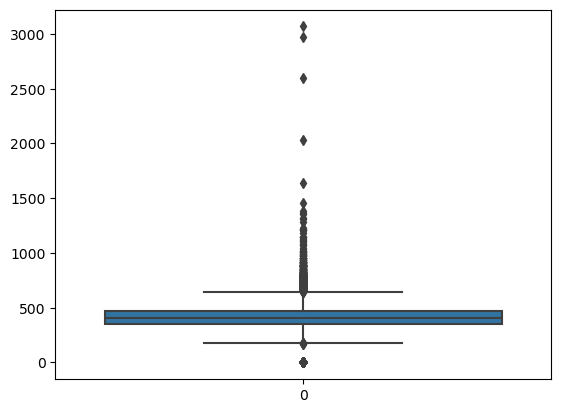

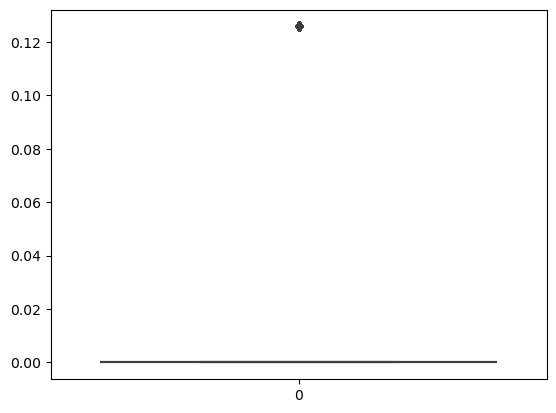

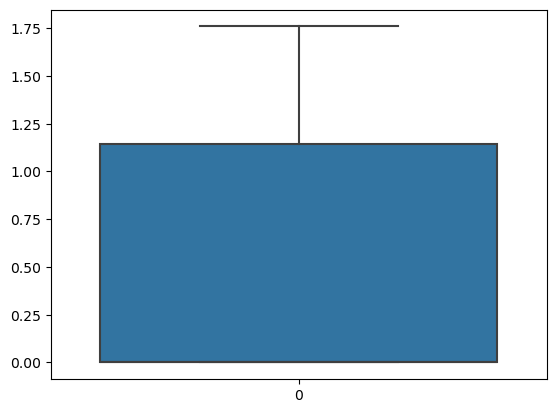

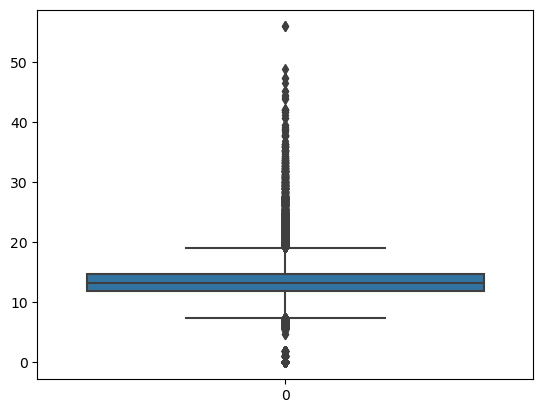

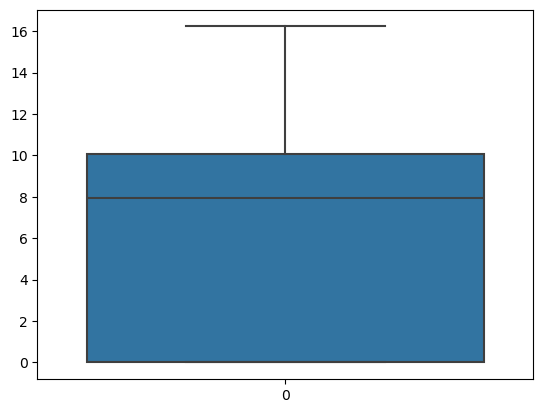

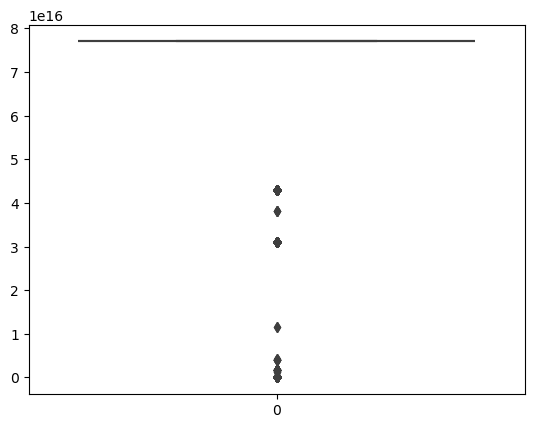

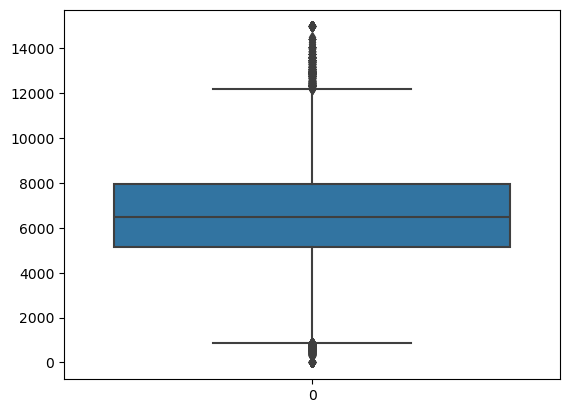

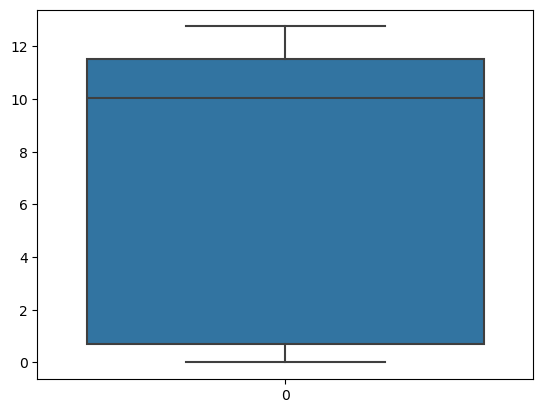

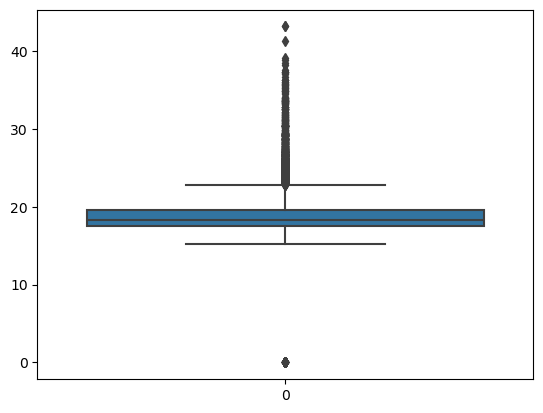

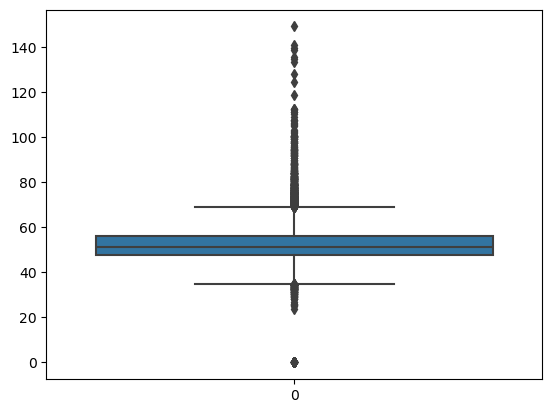

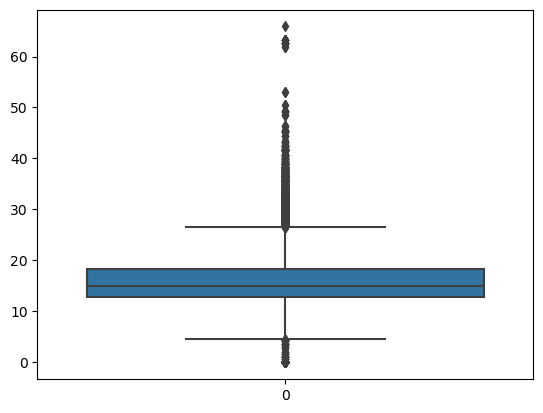

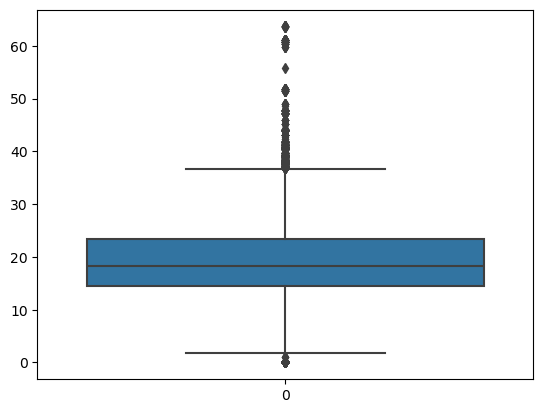

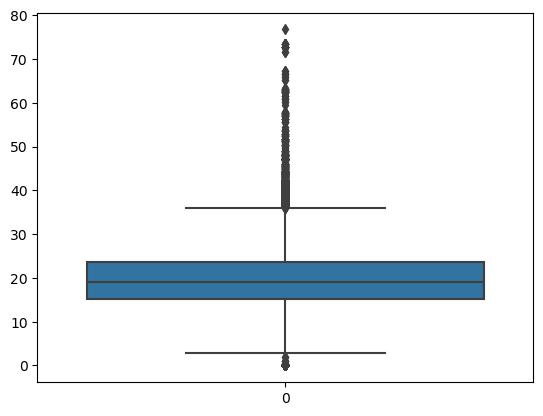

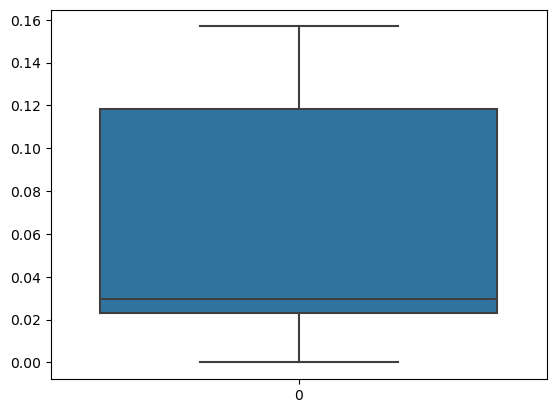

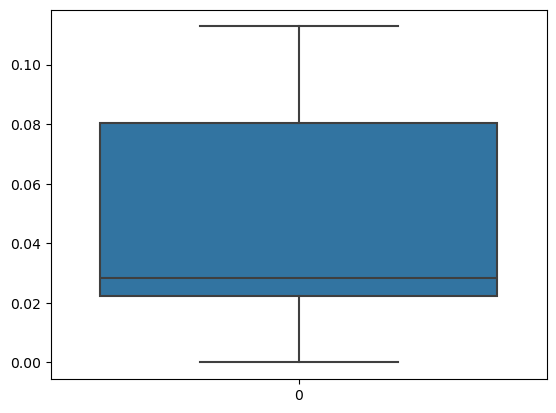

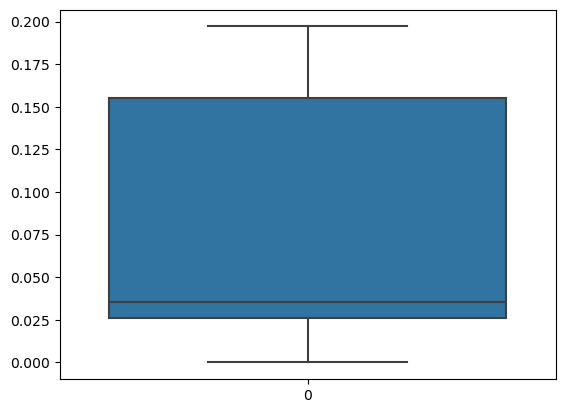

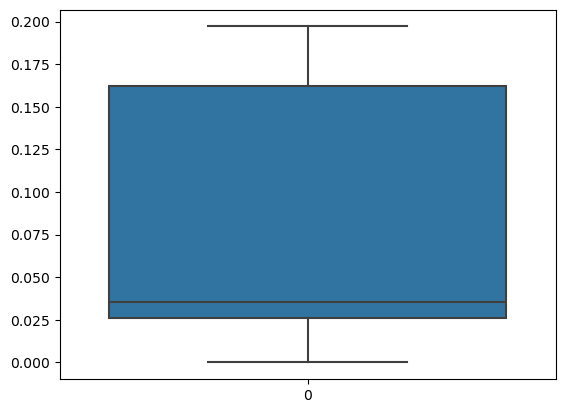

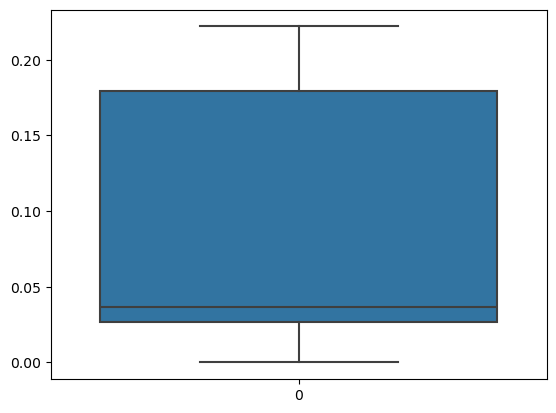

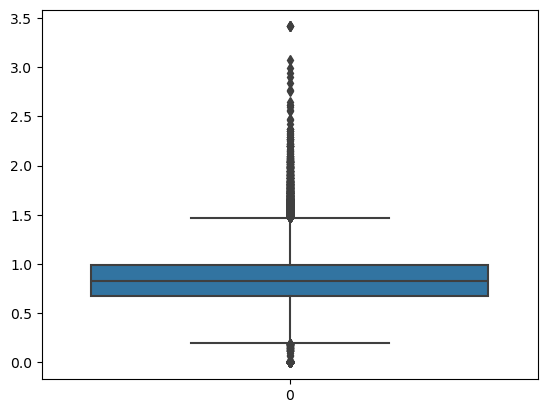

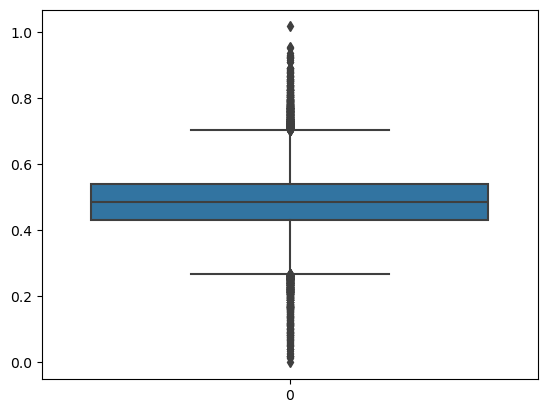

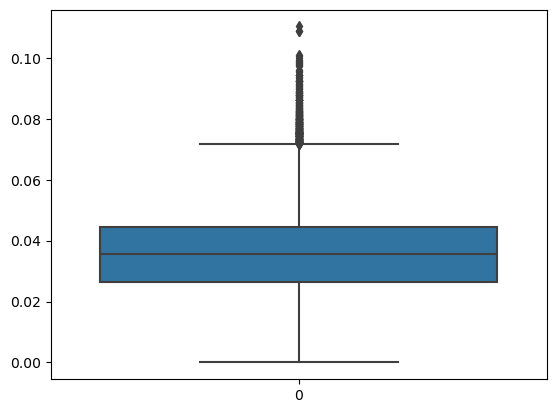

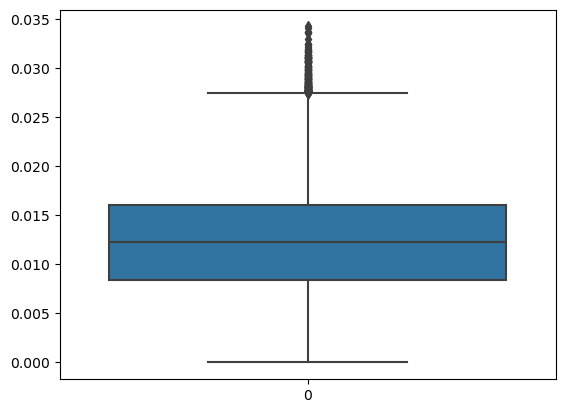

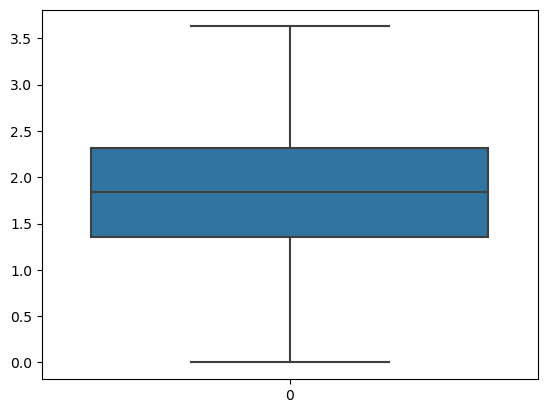

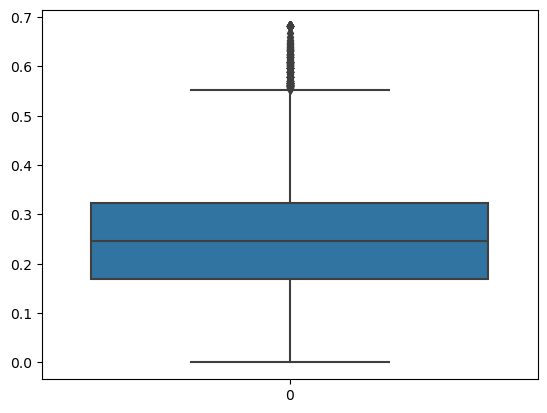

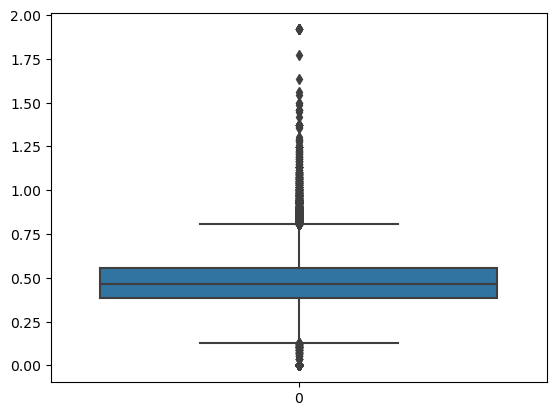

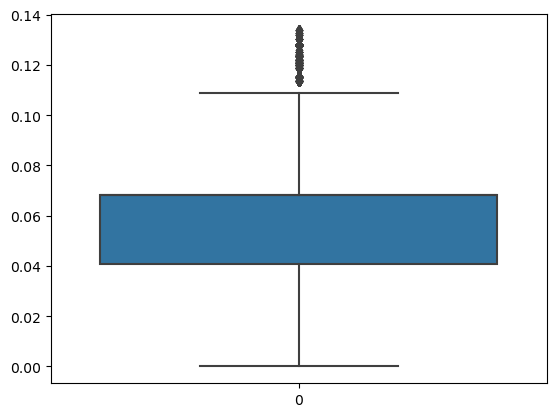

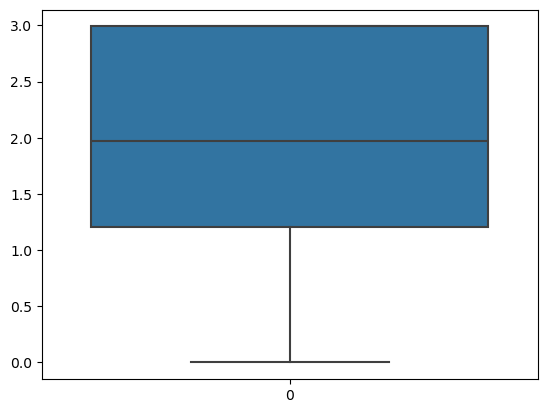

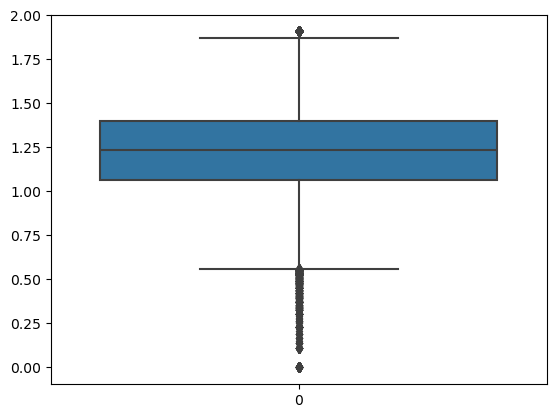

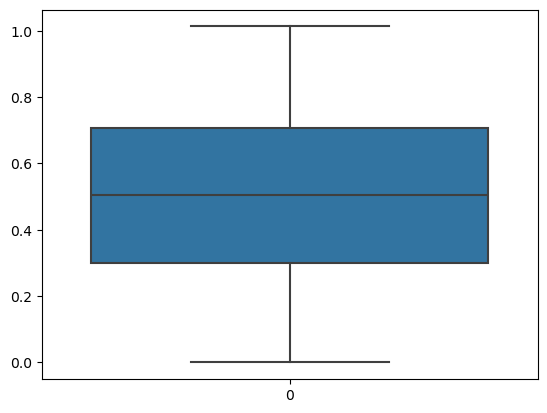

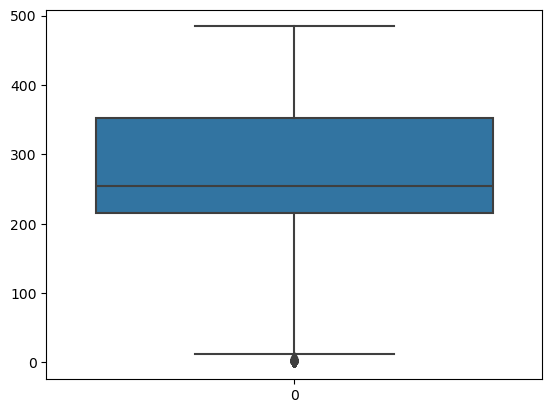

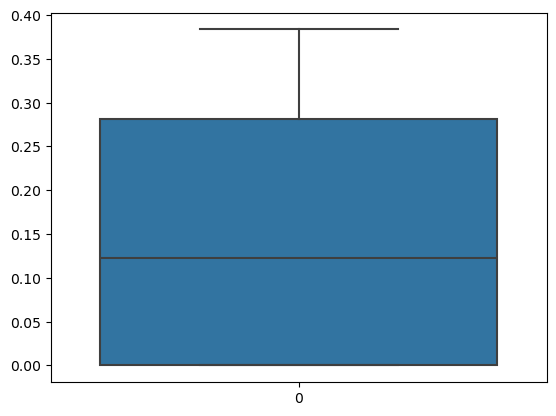

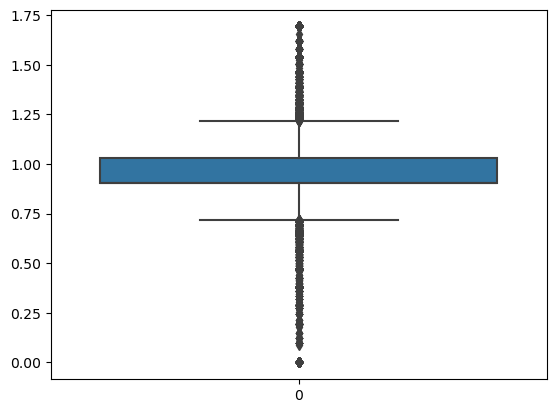

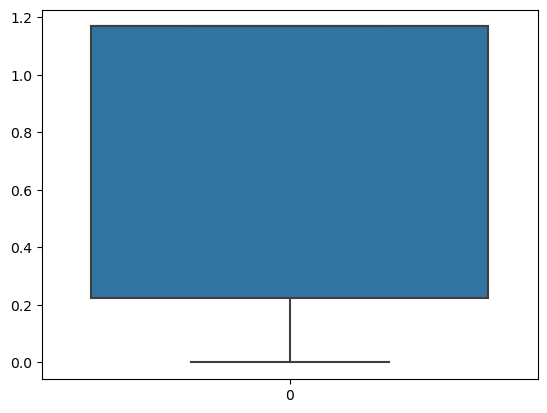

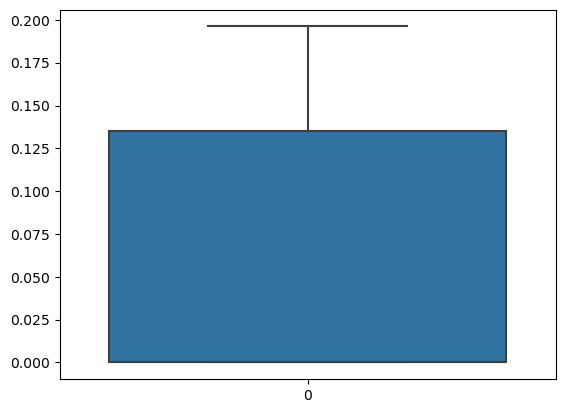

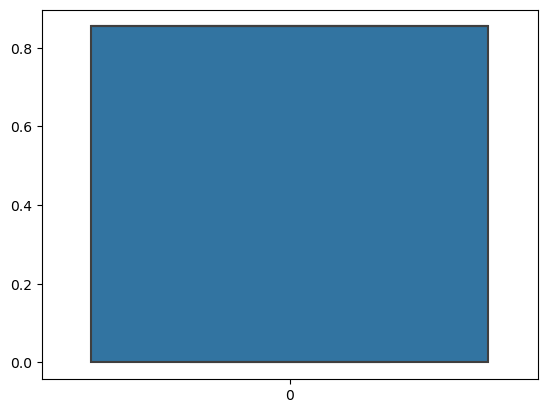

In [45]:
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df2_num_add[num_cols[i]])
    plt.show()